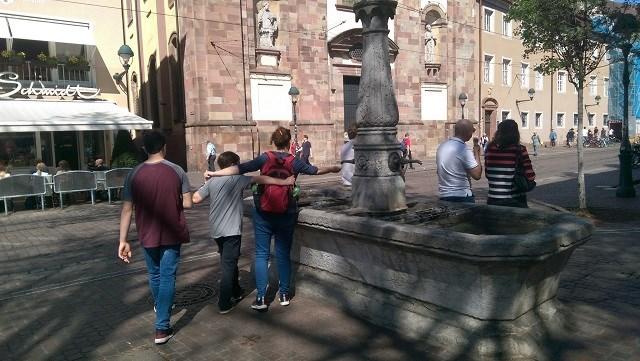

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow
import os
import urllib.request
import shutil


# Download the file from `url` and save it locally under `file_name`:
url='https://raw.githubusercontent.com/FelixKras/FileExchange/master/f1.jpg'
file_name='f1.jpg'
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)


# Read image
img = cv2.imread('f1.jpg', cv2.IMREAD_COLOR)

# Show image
cv2_imshow(img)

## Now that we loaded and have shown the picture, lets dive deeper.

**'Split' gives us separate channels of the image Red,Green,Blue (notice the reverse order).
Every channel by itself is a gray image with balues in a range of [0-255]**

In [0]:
b,g,r = cv2.split(img)
print("Only red channel")
cv2_imshow(r)




# Filter the bag:
**In fact the 'Red' bag is not purely red and has other shades.
Lets define a range of color between r=50,g=0,b=0 and r=255,g=40,b=50 (a bit of yellow tint)**




In [0]:
lower_red = np.array([0,0,50]) 
upper_red = np.array([40,40,255]) 

#filter red
mask = cv2.inRange(img, lower_red, upper_red)
cv2_imshow(mask)



# Filter noise

**Notice we have a lot of small white pixels all around the image.
Lets use a [Median filter](https://en.wikipedia.org/wiki/Median_filter) to remove all the small white noise from the mask image. you can increase the filter size so that only the biggest blob stays, but lets not make life too simple**

In [0]:
#median filter to clean small noise
median_blur= cv2.medianBlur(mask,11)

FilteredRed=np.zeros((img.shape[0], img.shape[1]))
FilteredRed[:,:]=r*median_blur
print("Red with median filter applied")
cv2_imshow(FilteredRed)


**Good, only 3 large blobs left and ours is the largest. Lets use it to get its location**

We use findcontours to locate areas with continuous white pixels.
contourArea returns the area enclosed by each ocontour.

In [0]:
#find contours of binary mask
Red_8bit = cv2.convertScaleAbs(FilteredRed)

im2,contours, hierarchy = cv2.findContours(Red_8bit, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))


**Now that we found the 3 contours we sort them by area and take the largest**


In [0]:
contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]

biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

cv2.polylines(img,[biggest_contour],True,(0,0,255),3)
cv2_imshow(img)